In [1]:
pip install feedparser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.9 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=8a0009a5b9eb50e6e7de277f904150e732b34e293b03d8b4c7ef90d342129370
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k


**Step 1 -  Data Collection**

In [2]:
import requests
import feedparser
import pandas as pd
from datetime import datetime
#import time

NEWSAPI_KEY = "eee874704f8443e29b78cdc6bf0c9629"
newsapi_url = "https://newsapi.org/v2/everything"

newsapi_params = {
    'q': 'climate OR climate change OR global warming',
    'language': 'en',
    'sortBy': 'publishedAt',
    'pageSize': 100, # 100 articles per request
    'page': 1,    # Retrieves the first page
    'apiKey': NEWSAPI_KEY
}
newsapi_articles = []

response = requests.get(newsapi_url, params=newsapi_params) #Sends a GET request to NewsAPI with the defined parameters
if response.status_code == 200:
    results = response.json() # convert JSON format into python dictionary
    for article in results['articles']:
        newsapi_articles.append({
            'title': article['title'],
            'description': article['description'],
            'source': article['source']['name'],
            'url': article['url'],
            'publishedAt': article['publishedAt'],
            'fetched_from': 'NewsAPI',
            'fetched_on': datetime.now()  # current timestamp when the article was fetched.
        })
    print(f"NewsAPI: {len(newsapi_articles)} articles fetched.")
else:
    print("NewsAPI error:", response.json())

rss_sources = {
    'BBC': 'http://feeds.bbci.co.uk/news/science_and_environment/rss.xml',
    'CNN': 'http://rss.cnn.com/rss/edition_earth.rss',
    'Guardian': 'https://www.theguardian.com/environment/rss',
    'Reuters': 'https://www.reuters.com/rssFeed/environmentNews'
}

rss_articles = []

for source, url in rss_sources.items():
    feed = feedparser.parse(url)
    print(f" Fetching from {source}...")
    for entry in feed.entries:
        rss_articles.append({
            'title': entry.title,
            'description': entry.summary if 'summary' in entry else '',
            'source': source,
            'url': entry.link,
            'publishedAt': entry.get('published', ''),
            'fetched_from': 'RSS',
            'fetched_on': datetime.now()
        })

print(f" RSS Feeds: {len(rss_articles)} articles fetched.")

# === Combine and Save ===
combined = newsapi_articles + rss_articles
df = pd.DataFrame(combined)
df.to_csv("raw_climate_news.csv", index=False)
print(f"📦 All collected articles saved to 'raw_climate_news.csv' ({len(df)} rows)")


NewsAPI: 95 articles fetched.
 Fetching from BBC...
 Fetching from CNN...
 Fetching from Guardian...
 Fetching from Reuters...
 RSS Feeds: 77 articles fetched.
📦 All collected articles saved to 'raw_climate_news.csv' (172 rows)


In [3]:
# Existing + extra RSS feeds
rss_sources = {
    'BBC': 'http://feeds.bbci.co.uk/news/science_and_environment/rss.xml',
    'CNN': 'http://rss.cnn.com/rss/edition_earth.rss',
    'Guardian': 'https://www.theguardian.com/environment/rss',
    'Reuters': 'https://www.reuters.com/rssFeed/environmentNews',
    'Nature Climate': 'https://www.nature.com/nclimate.rss',
    'Scientific American': 'https://www.scientificamerican.com/feed/climate/',
    'Yale Climate Connections': 'https://yaleclimateconnections.org/feed/',
    'EcoWatch': 'https://www.ecowatch.com/rss.xml'
}
rss_articles = []

for source, url in rss_sources.items():
    feed = feedparser.parse(url)
    print(f"📡 Fetching from {source}")
    for entry in feed.entries:
        rss_articles.append({
            'title': entry.title,
            'description': entry.get('summary', ''),
            'source': source,
            'url': entry.link,
            'publishedAt': entry.get('published', ''),
            'fetched_from': 'RSS',
            'fetched_on': datetime.now()
        })

# Save to CSV
df_rss = pd.DataFrame(rss_articles)
df_rss.to_csv('rss_climate_news.csv', index=False)
print(f" RSS articles saved: {len(df_rss)} to 'rss_climate_news.csv'")


📡 Fetching from BBC
📡 Fetching from CNN
📡 Fetching from Guardian
📡 Fetching from Reuters
📡 Fetching from Nature Climate
📡 Fetching from Scientific American
📡 Fetching from Yale Climate Connections
📡 Fetching from EcoWatch
 RSS articles saved: 95 to 'rss_climate_news.csv'


In [4]:
df1 = pd.read_csv('raw_climate_news.csv')
df2 = pd.read_csv('rss_climate_news.csv')

combined = pd.concat([df1, df2]).drop_duplicates()
combined.to_csv('raw_climate_news.csv', index=False)

print(f" Final combined dataset: {len(combined)} articles")


 Final combined dataset: 267 articles


In [5]:
df = pd.read_csv('raw_climate_news.csv')
print("📄 Columns:", df.columns.tolist())
print(" Total articles:", len(df))
df.head(3)


📄 Columns: ['title', 'description', 'source', 'url', 'publishedAt', 'fetched_from', 'fetched_on']
 Total articles: 267


,title,description,source,url,publishedAt,fetched_from,fetched_on
0,Trump Calls Out Both Putin And Zelensky Over C...,US President Donald Trump lashed out Sunday at...,Ibtimes.com.au,https://www.ibtimes.com.au/trump-calls-out-bot...,2025-03-31T02:06:19Z,NewsAPI,2025-04-01 02:24:11.225467
1,Rebecca Tickell talks about the Global Watch P...,Rebecca Tickell chatted about the Global Watch...,Digital Journal,https://www.digitaljournal.com/entertainment/r...,2025-03-31T00:10:57Z,NewsAPI,2025-04-01 02:24:11.225477
2,Forest bathing and hay baths: 5 innovative wel...,From hay baths to high-altitude forest bathing...,National Geographic,https://www.nationalgeographic.com/travel/arti...,2025-03-31T00:00:00Z,NewsAPI,2025-04-01 02:24:11.225480


 **Step 2 - Data Preprocessing:**

In [6]:
# Check total nulls in each column
print("Null values:\n", df.isnull().sum())


Null values:
 title           0
description     0
source          0
url             0
publishedAt     8
fetched_from    0
fetched_on      0
dtype: int64


In [7]:
# Drop rows with missing title or description
df.dropna(subset=['title','publishedAt'], inplace=True)

In [8]:
# Check total nulls in each column
print(" Null values:\n", df.isnull().sum())


 Null values:
 title           0
description     0
source          0
url             0
publishedAt     0
fetched_from    0
fetched_on      0
dtype: int64


In [9]:
duplicate_total = df.duplicated().sum()
print(f" Total duplicate rows (entire row match): {duplicate_total}")


 Total duplicate rows (entire row match): 0


In [10]:
duplicate_count = df.duplicated(subset=['title', 'description','publishedAt']).sum()
print(f" Duplicate rows (based on title & description & publishedAt): {duplicate_count}")


 Duplicate rows (based on title & description & publishedAt): 81


In [11]:
# Drop duplicate rows based on title, description, and publishedAt
df = df.drop_duplicates(subset=['title', 'description', 'publishedAt'])

# Reset index after dropping
df.reset_index(drop=True, inplace=True)

print(f" Duplicates removed. New total rows: {len(df)}")


 Duplicates removed. New total rows: 178


In [12]:
duplicate_count = df.duplicated(subset=['title', 'description','publishedAt']).sum()
print(f" Duplicate rows (based on title & description & publishedAt): {duplicate_count}")


 Duplicate rows (based on title & description & publishedAt): 0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         178 non-null    object
 1   description   178 non-null    object
 2   source        178 non-null    object
 3   url           178 non-null    object
 4   publishedAt   178 non-null    object
 5   fetched_from  178 non-null    object
 6   fetched_on    178 non-null    object
dtypes: object(7)
memory usage: 9.9+ KB


In [14]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(" Categorical columns:", categorical_cols)
print(" Numerical columns:", numerical_cols)

 Categorical columns: ['title', 'description', 'source', 'url', 'publishedAt', 'fetched_from', 'fetched_on']
 Numerical columns: []


In [15]:
print("\n Descriptive stats for numerical columns:")
print(df.describe())

print("\n Value counts for sources:")
print(df['source'].value_counts())


 Descriptive stats for numerical columns:
                     title                                        description  \
count                  178                                                178   
unique                 169                                                176   
top     BBC Inside Science  An expanse of Gulf Coast federal waters larger...   
freq                     4                                                  2   

       source                                                url  \
count     178                                                178   
unique     71                                                178   
top       BBC  https://www.ibtimes.com.au/trump-calls-out-bot...   
freq       43                                                  1   

                 publishedAt fetched_from                  fetched_on  
count                    178          178                         178  
unique                   169            2                         

In [16]:
print(df[['title', 'description']].head(3))

                                               title  \
0  Trump Calls Out Both Putin And Zelensky Over C...   
1  Rebecca Tickell talks about the Global Watch P...   
2  Forest bathing and hay baths: 5 innovative wel...   

                                         description  
0  US President Donald Trump lashed out Sunday at...  
1  Rebecca Tickell chatted about the Global Watch...  
2  From hay baths to high-altitude forest bathing...  


In [17]:
df.to_csv('final_cleaned_climate_news.csv', index=False)
print(f"\n Final cleaned dataset saved to 'final_cleaned_climate_news.csv' with {len(df)} rows.")


 Final cleaned dataset saved to 'final_cleaned_climate_news.csv' with 178 rows.


In [18]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup # Import BeautifulSoup

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
# Set up stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text)
    text = BeautifulSoup(text, "html.parser").get_text()            # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)                         # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip()                        # Remove extra spaces
    text = text.lower()                                             # Convert to lowercase
    words = text.split()                                            # Tokenization
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]  # Stopword removal + Lemmatization
    return ' '.join(words)

In [20]:
df['clean_title'] = df['title'].apply(clean_text)
df['clean_description'] = df['description'].apply(clean_text)

In [21]:
df.head(3)

,title,description,source,url,publishedAt,fetched_from,fetched_on,clean_title,clean_description
0,Trump Calls Out Both Putin And Zelensky Over C...,US President Donald Trump lashed out Sunday at...,Ibtimes.com.au,https://www.ibtimes.com.au/trump-calls-out-bot...,2025-03-31T02:06:19Z,NewsAPI,2025-04-01 02:24:11.225467,trump call putin zelensky ceasefire talk,u president donald trump lashed sunday leader ...
1,Rebecca Tickell talks about the Global Watch P...,Rebecca Tickell chatted about the Global Watch...,Digital Journal,https://www.digitaljournal.com/entertainment/r...,2025-03-31T00:10:57Z,NewsAPI,2025-04-01 02:24:11.225477,rebecca tickell talk global watch party enviro...,rebecca tickell chatted global watch party upc...
2,Forest bathing and hay baths: 5 innovative wel...,From hay baths to high-altitude forest bathing...,National Geographic,https://www.nationalgeographic.com/travel/arti...,2025-03-31T00:00:00Z,NewsAPI,2025-04-01 02:24:11.225480,forest bathing hay bath innovative wellness re...,hay bath highaltitude forest bathing new wave ...


In [22]:
df.to_csv('cleaned_climate_news.csv', index=False)
print(f" Preprocessing complete Saved {len(df)} cleaned articles to 'cleaned_climate_news.csv'")


 Preprocessing complete Saved 178 cleaned articles to 'cleaned_climate_news.csv'


**Step 3**

In [23]:
df = pd.read_csv('cleaned_climate_news.csv')

# Strong keywords (same as before)
strong_keywords = {
    'Policy': [
        'policy', 'government', 'ban', 'law', 'laws', 'agreement', 'bill', 'pledge',
        'regulation', 'act', 'framework', 'treaty', 'legislation', 'carbon tax', 'net zero',
        'climate action', 'emission target', 'cop28', 'cop26', 'paris agreement'
    ],
    'Scientific Research': [
        'research', 'study', 'scientist', 'scientists', 'university', 'finding', 'data',
        'academic', 'paper', 'journal', 'experiment', 'simulation', 'report', 'analysis',
        'peer review', 'discovery', 'model', 'lab', 'method', 'testing'
    ],
    'Natural Disasters': [
        'flood', 'storm', 'hurricane', 'wildfire', 'earthquake', 'drought', 'heatwave',
        'cyclone', 'tsunami', 'landslide', 'natural disaster', 'disaster', 'monsoon'
    ],
    'Activism': [
        'activist', 'protest', 'march', 'rally', 'demonstration', 'strike', 'movement',
        'boycott', 'petition', 'campaign', 'climate justice', 'greenpeace', 'fridays for future'
    ]
}
# Soft keyword context terms
soft_clues = {
    'Policy': ['minister', 'environmental law', 'un meeting', 'leaders', 'policy change'],
    'Scientific Research': ['results', 'study shows', 'evidence', 'scientific team'],
    'Natural Disasters': ['climate event', 'impact', 'severe weather'],
    'Activism': ['public pressure', 'activists demand', 'youth movement', 'global strike']
}
def label_article(row):
    desc = str(row['clean_description']).lower()
    title = str(row['clean_title']).lower()
    combined = desc + " " + title

    for category, wordlist in strong_keywords.items():
        if any(word in combined for word in wordlist):
            return category

    for category, wordlist in soft_clues.items():
        if any(word in combined for word in wordlist):
            return category

    if 'climate' in combined:
        if 'carbon' in combined or 'law' in combined:
            return 'Policy'
        elif 'scientific' in combined or 'study' in combined:
            return 'Scientific Research'
        elif 'disaster' in combined or 'storm' in combined:
            return 'Natural Disasters'
        elif 'protest' in combined or 'activist' in combined:
            return 'Activism'

    return 'Other'
# Apply smart labeling
df['category'] = df.apply(label_article, axis=1)

# Save results
df.to_csv('better_labeled_climate_news.csv', index=False)
print(" Enhanced multi-layer labeling complete!")
print("\n Final Distribution:\n")
print(df['category'].value_counts())


 Enhanced multi-layer labeling complete!

 Final Distribution:

category
Other                  75
Policy                 44
Scientific Research    36
Activism               12
Natural Disasters      11
Name: count, dtype: int64


**Step 3 - Exploratory Data Analysis**

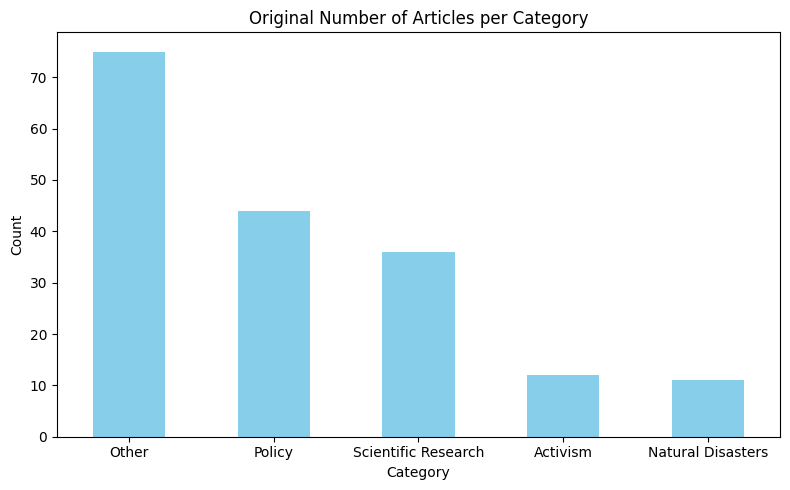

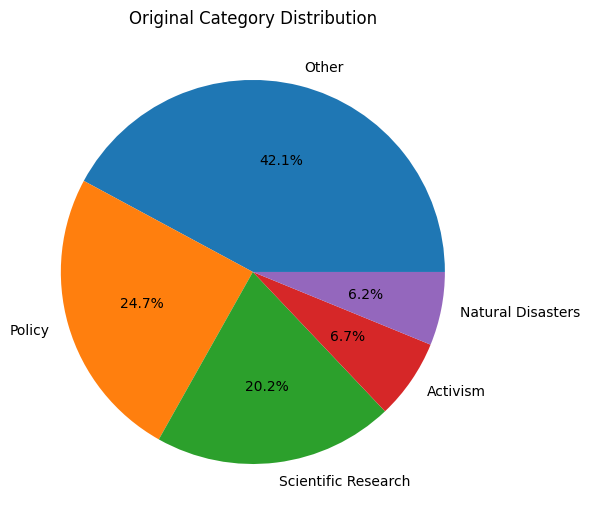

SMOTE Balanced Dataset Saved to 'smote_balanced_climate_news.csv'


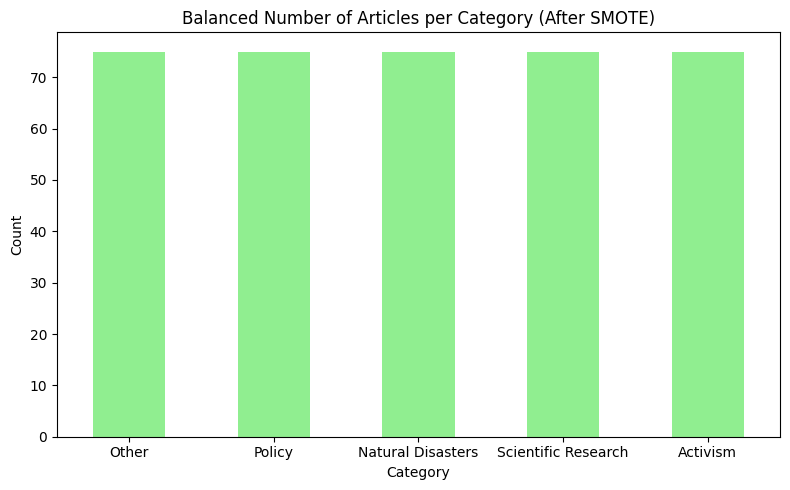

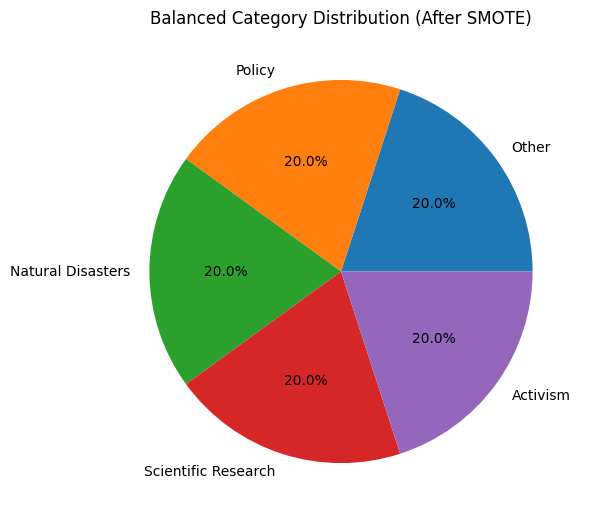

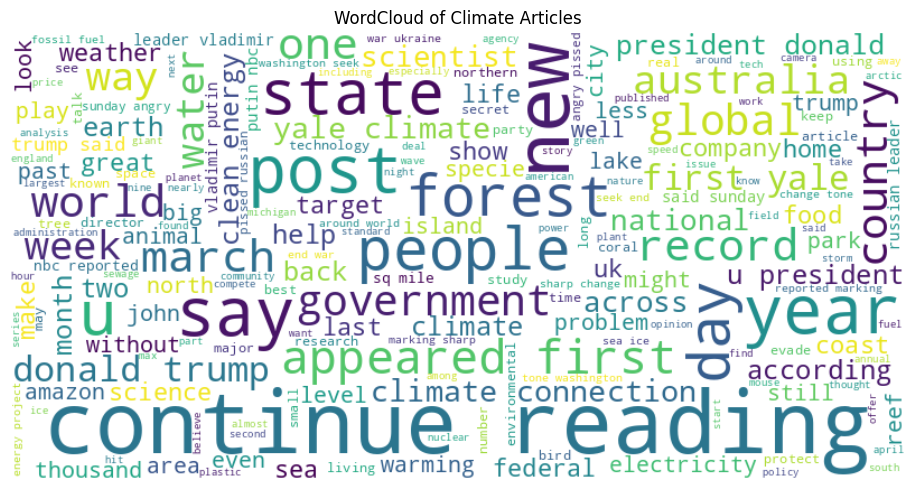

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

df = pd.read_csv('better_labeled_climate_news.csv')

# Original class distribution
plt.figure(figsize=(8, 5))
df['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Original Number of Articles per Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
df['category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Original Category Distribution")
plt.ylabel("")
plt.tight_layout()
plt.show()

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_vect = vectorizer.fit_transform(df['clean_description'])
y = df['category']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_vect, y)

feature_names = vectorizer.get_feature_names_out()
balanced_df = pd.DataFrame(X_resampled.toarray(), columns=feature_names)
balanced_df['category'] = y_resampled.values
balanced_df.to_csv('smote_balanced_climate_news.csv', index=False)
print("SMOTE Balanced Dataset Saved to 'smote_balanced_climate_news.csv'")

plt.figure(figsize=(8, 5))
pd.Series(y_resampled).value_counts().plot(kind='bar', color='lightgreen')
plt.title("Balanced Number of Articles per Category (After SMOTE)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
pd.Series(y_resampled).value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Balanced Category Distribution (After SMOTE)")
plt.ylabel("")
plt.tight_layout()
plt.show()

text = ' '.join(df['clean_description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Climate Articles")
plt.tight_layout()
plt.show()

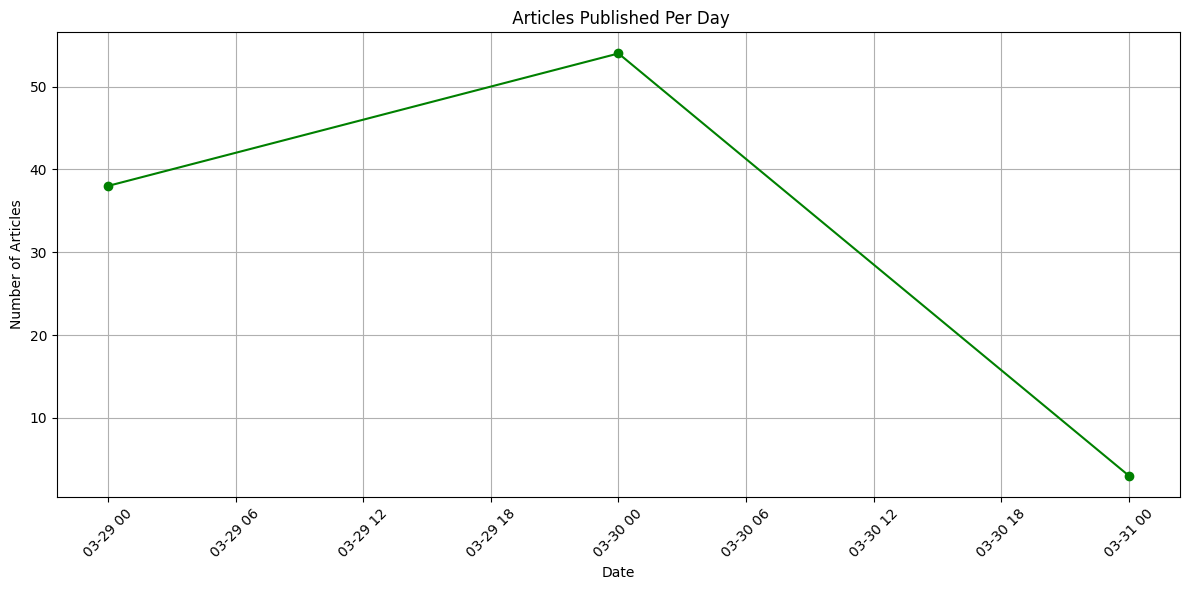

In [25]:
import matplotlib.pyplot as plt

# Ensure the 'publishedAt' column is datetime and extract the date
if 'publishedAt' in df.columns:
    df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')
    df['date'] = df['publishedAt'].dt.date

# Plot the publication trend if the date column exists
if 'date' in df.columns:
    trend = df['date'].value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    trend.plot(kind='line', marker='o', color='green')
    plt.title(" Articles Published Per Day")
    plt.xlabel("Date")
    plt.ylabel("Number of Articles")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(" 'publishedAt' or 'date' column not available.")


In [26]:
df.head()

,title,description,source,url,publishedAt,fetched_from,fetched_on,clean_title,clean_description,category,date
0,Trump Calls Out Both Putin And Zelensky Over C...,US President Donald Trump lashed out Sunday at...,Ibtimes.com.au,https://www.ibtimes.com.au/trump-calls-out-bot...,2025-03-31 02:06:19+00:00,NewsAPI,2025-04-01 02:24:11.225467,trump call putin zelensky ceasefire talk,u president donald trump lashed sunday leader ...,Other,2025-03-31
1,Rebecca Tickell talks about the Global Watch P...,Rebecca Tickell chatted about the Global Watch...,Digital Journal,https://www.digitaljournal.com/entertainment/r...,2025-03-31 00:10:57+00:00,NewsAPI,2025-04-01 02:24:11.225477,rebecca tickell talk global watch party enviro...,rebecca tickell chatted global watch party upc...,Other,2025-03-31
2,Forest bathing and hay baths: 5 innovative wel...,From hay baths to high-altitude forest bathing...,National Geographic,https://www.nationalgeographic.com/travel/arti...,2025-03-31 00:00:00+00:00,NewsAPI,2025-04-01 02:24:11.225480,forest bathing hay bath innovative wellness re...,hay bath highaltitude forest bathing new wave ...,Other,2025-03-31
3,UK’s Starmer in ‘Productive’ Talks With Trump ...,UK Prime Minister Keir Starmer held “productiv...,Financial Post,https://financialpost.com/pmn/business-pmn/uks...,2025-03-30 23:19:39+00:00,NewsAPI,2025-04-01 02:24:11.225482,uk starmer productive talk trump crunch week,uk prime minister keir starmer held productive...,Policy,2025-03-30
4,Great Lakes region loses power due to freezing...,Freezing rain brought down trees and power lin...,PBS,https://www.pbs.org/newshour/nation/great-lake...,2025-03-30 22:44:03+00:00,NewsAPI,2025-04-01 02:24:11.225484,great lake region loses power due freezing rai...,freezing rain brought tree power line michigan...,Natural Disasters,2025-03-30


**Step 4 - Feature Engineering & NLP**

In [27]:
# --- Install Required Packages ---
!pip install -q spacy gensim
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [28]:
# --- Required Libraries ---
!pip install -q spacy gensim
!python -m spacy download en_core_web_sm

import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Load Dataset ---
df = pd.read_csv('better_labeled_climate_news.csv')

# --- Create Text Field ---
df['text'] = df['clean_title'].fillna('') + ' ' + df['clean_description'].fillna('')

# --- Tokenization ---
nlp = spacy.load("en_core_web_sm")
df['tokens'] = df['text'].apply(lambda x: [
    token.text.lower() for token in nlp(str(x)) if not token.is_punct and not token.is_space
])
print("Tokenization complete!")

# --- Save Preprocessed Dataset ---
df.to_csv('step4_tokenized_climate_news.csv', index=False)
print("Saved as 'step4_tokenized_climate_news.csv'")


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Tokenization complete!
Saved as 'step4_tokenized_climate_news.csv'


In [29]:
df.head(20)

,title,description,source,url,publishedAt,fetched_from,fetched_on,clean_title,clean_description,category,text,tokens
0,Trump Calls Out Both Putin And Zelensky Over C...,US President Donald Trump lashed out Sunday at...,Ibtimes.com.au,https://www.ibtimes.com.au/trump-calls-out-bot...,2025-03-31T02:06:19Z,NewsAPI,2025-04-01 02:24:11.225467,trump call putin zelensky ceasefire talk,u president donald trump lashed sunday leader ...,Other,trump call putin zelensky ceasefire talk u pre...,"[trump, call, putin, zelensky, ceasefire, talk..."
1,Rebecca Tickell talks about the Global Watch P...,Rebecca Tickell chatted about the Global Watch...,Digital Journal,https://www.digitaljournal.com/entertainment/r...,2025-03-31T00:10:57Z,NewsAPI,2025-04-01 02:24:11.225477,rebecca tickell talk global watch party enviro...,rebecca tickell chatted global watch party upc...,Other,rebecca tickell talk global watch party enviro...,"[rebecca, tickell, talk, global, watch, party,..."
2,Forest bathing and hay baths: 5 innovative wel...,From hay baths to high-altitude forest bathing...,National Geographic,https://www.nationalgeographic.com/travel/arti...,2025-03-31T00:00:00Z,NewsAPI,2025-04-01 02:24:11.225480,forest bathing hay bath innovative wellness re...,hay bath highaltitude forest bathing new wave ...,Other,forest bathing hay bath innovative wellness re...,"[forest, bathing, hay, bath, innovative, welln..."
3,UK’s Starmer in ‘Productive’ Talks With Trump ...,UK Prime Minister Keir Starmer held “productiv...,Financial Post,https://financialpost.com/pmn/business-pmn/uks...,2025-03-30T23:19:39Z,NewsAPI,2025-04-01 02:24:11.225482,uk starmer productive talk trump crunch week,uk prime minister keir starmer held productive...,Policy,uk starmer productive talk trump crunch week u...,"[uk, starmer, productive, talk, trump, crunch,..."
4,Great Lakes region loses power due to freezing...,Freezing rain brought down trees and power lin...,PBS,https://www.pbs.org/newshour/nation/great-lake...,2025-03-30T22:44:03Z,NewsAPI,2025-04-01 02:24:11.225484,great lake region loses power due freezing rai...,freezing rain brought tree power line michigan...,Natural Disasters,great lake region loses power due freezing rai...,"[great, lake, region, loses, power, due, freez..."
5,7 Powerful Street Art Pieces Fighting for the ...,Explore seven extraordinary street art pieces ...,Streetartutopia.com,https://streetartutopia.com/2025/03/31/street-...,2025-03-30T22:01:00Z,NewsAPI,2025-04-01 02:24:11.225487,powerful street art piece fighting planet,explore seven extraordinary street art piece m...,Policy,powerful street art piece fighting planet expl...,"[powerful, street, art, piece, fighting, plane..."
6,Trump says he is 'pissed off' with Putin over ...,U.S. President Donald Trump said Sunday he was...,Japan Today,https://japantoday.com/category/world/trump-sa...,2025-03-30T21:34:33Z,NewsAPI,2025-04-01 02:24:11.225489,trump say pissed putin ukraine,u president donald trump said sunday angry pis...,Scientific Research,trump say pissed putin ukraine u president don...,"[trump, say, pissed, putin, ukraine, u, presid..."
7,"Ticker: Biden offshore leases unlawful, judge ...",An expanse of Gulf Coast federal waters larger...,Biztoc.com,https://biztoc.com/x/2d62327858ee5ee2,2025-03-30T21:23:42Z,NewsAPI,2025-04-01 02:24:11.225495,ticker biden offshore lease unlawful judge say...,expanse gulf coast federal water larger state ...,Policy,ticker biden offshore lease unlawful judge say...,"[ticker, biden, offshore, lease, unlawful, jud..."
8,"Ticker: Biden offshore leases unlawful, judge ...",An expanse of Gulf Coast federal waters larger...,Boston Herald,https://www.bostonherald.com/2025/03/30/ticker...,2025-03-30T21:13:00Z,NewsAPI,2025-04-01 02:24:11.225499,ticker biden offshore lease unlawful judge say...,expanse gulf coast federal water larger state ...,Policy,ticker biden offshore lease unlawful judge say...,"[ticker, biden, offshore, lease, unlawful, jud..."
9,Examining the Global Carbon P

**Step 5 - Model Development**


Training Logistic Regression...
Accuracy: 0.8800
                     precision    recall  f1-score   support

           Activism       1.00      0.93      0.97        15
  Natural Disasters       0.94      1.00      0.97        15
              Other       0.67      0.80      0.73        15
             Policy       0.92      0.73      0.81        15
Scientific Research       0.93      0.93      0.93        15

           accuracy                           0.88        75
          macro avg       0.89      0.88      0.88        75
       weighted avg       0.89      0.88      0.88        75


Training Naive Bayes...
Accuracy: 0.8533
                     precision    recall  f1-score   support

           Activism       0.94      1.00      0.97        15
  Natural Disasters       0.71      1.00      0.83        15
              Other       0.89      0.53      0.67        15
             Policy       0.92      0.80      0.86        15
Scientific Research       0.88      0.93      0.90

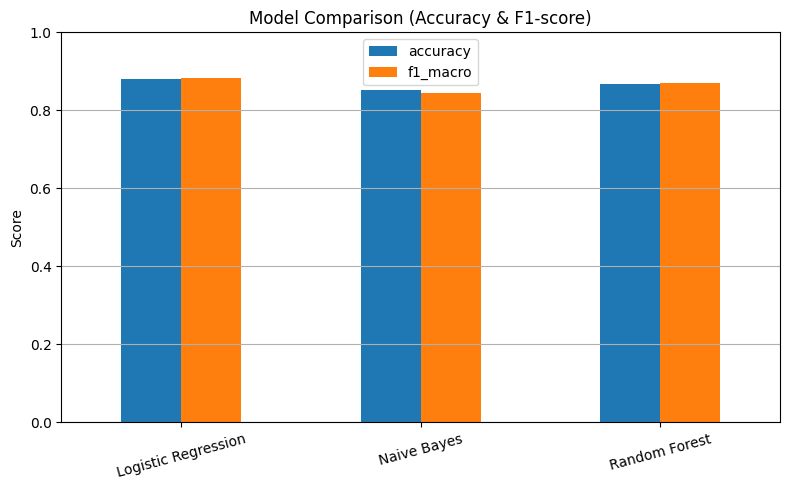


Best model based on F1-score: Logistic Regression


In [30]:
# --- Libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# --- Load Tokenized Dataset ---
df = pd.read_csv('step4_tokenized_climate_news.csv')
X_text = df['text']
y = df['category']

# --- TF-IDF ---
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1,2))
X_vect = vectorizer.fit_transform(X_text)

# --- Apply SMOTE ---
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_vect.toarray(), y)

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42
)

# --- Model Training ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, C=0.5),
    "Naive Bayes": MultinomialNB(alpha=0.5),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    results[name] = {
        'model': model,
        'accuracy': acc,
        'f1_macro': report['macro avg']['f1-score']
    }

# --- Compare Results ---
summary = pd.DataFrame(results).T[['accuracy', 'f1_macro']]
print("\nModel Comparison Summary:")
print(summary)

# --- Plot ---
summary.plot(kind='bar', figsize=(8, 5), title="Model Comparison (Accuracy & F1-score)")
plt.ylabel("Score")
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# --- Best Model ---
best_model_name = summary['f1_macro'].idxmax()
print(f"\nBest model based on F1-score: {best_model_name}")


In [31]:
#  Random Forest Model
#rf_model = RandomForestClassifier(random_state=42)
#rf_model.fit(X_train, y_train)

#  Predictions and Evaluation
#y_train_pred = rf_model.predict(X_train)
#y_test_pred = rf_model.predict(X_test)

#train_accuracy = accuracy_score(y_train, y_train_pred)
#test_accuracy = accuracy_score(y_test, y_test_pred)

#print(f" Random Forest Train Accuracy: {train_accuracy:.4f}")
#print(f" Random Forest Test Accuracy: {test_accuracy:.4f}")

# Logistic Regression Model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Predictions and Evaluation
y_train_pred = logreg_model.predict(X_train)
y_test_pred = logreg_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f" Logistic Regression Train Accuracy: {train_accuracy:.4f}")
print(f" Logistic Regression Test Accuracy: {test_accuracy:.4f}")


 Logistic Regression Train Accuracy: 0.9933
 Logistic Regression Test Accuracy: 0.8933


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define hyperparameters to tune
param_grid = {
    'penalty': ['l2'],  # Regularization term
    'C': [0.01, 0.05, 0.1],  # Stronger regularization with smaller C
    'solver': ['saga', 'liblinear'],  # Better solvers for optimization
    'max_iter': [100, 200, 800],  # Iterations for convergence
    'class_weight': [None]  # If imbalance is not an issue, try removing this
}

# Initialize Logistic Regression
logreg_model = LogisticRegression()

# Create GridSearchCV object for hyperparameter tuning
# Use n_jobs=1 to avoid parallelization issues and cv=3 for fewer folds (optional)
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid,
                           cv=3, n_jobs=1, verbose=2, scoring='accuracy')

# Fit GridSearch to find best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print("\nBest Parameters found by GridSearch:")
print(best_params)

# Use the best model found from GridSearchCV
best_logreg_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_logreg_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Accuracy of best Logistic Regression model: {test_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Check the train accuracy (to see if overfitting is reduced)
y_train_pred = best_logreg_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

print(f"\nTrain Accuracy: {train_accuracy:.4f}")
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   1.3s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   1.4s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2, solver=saga; total time=   1.5s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.01, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=   2.4s
[CV] END C=0.01, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=   1.6s
[CV] END C=0.01, class_weight=None, max_iter=200, penalty=l2, solver=saga; total time=   1.5s
[CV] END C=0.01, class_weight=None, max_iter=200, penalty=l2, solver=liblinear

**Step 6 - Result Interpretation & Visualization**

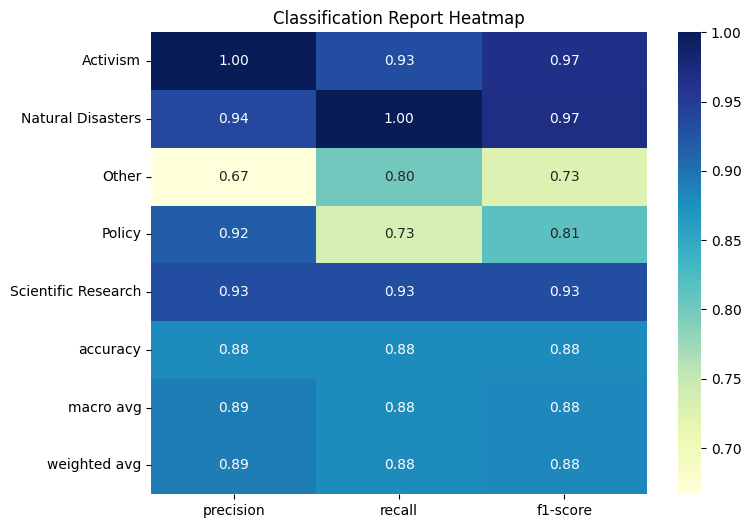


Misclassified Articles:
                                                title  \
9   Examining the Global Carbon Project’s Estimate...   
15    Trump says 'very angry' with Putin over Ukraine   
35   Trump administration cancels clean energy grants   
50  I’ve recognized manipulation in the past, and ...   
53  Blue Jays' Max Scherzer felt 'imminent danger'...   
55  The media’s Great Barrier Reef hoax is bigger ...   
65  Red meat challenges: Tech, environment, demand...   
66  As the Arctic's Winter Sea Ice Hits a New Reco...   
67  The 10 Netflix Original Anime Shows You Don't ...   

                                          description             category  
9   So, what I did was to examine how well each in...  Scientific Research  
15  WASHINGTON: US President Donald Trump said Sun...  Scientific Research  
35  Hundreds of clean energy projects funded by th...                Other  
50  Anyone with common sense can tell when there’s...                Other  
53  Max Scherzer se

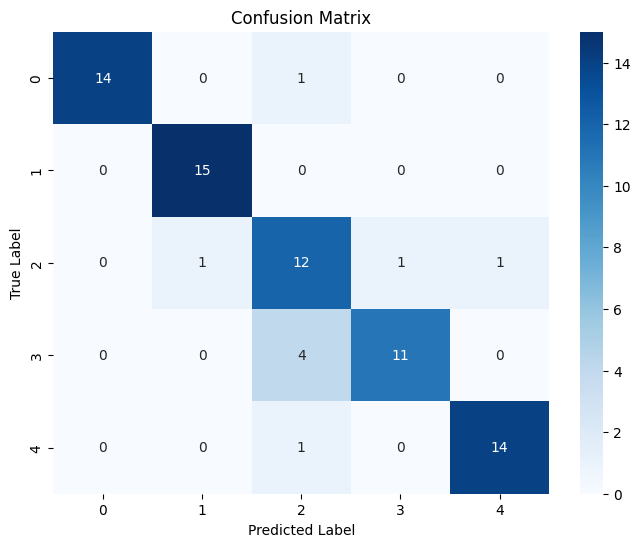

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Classification Report Visualization
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(8, 6))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Classification Report Heatmap")
plt.show()

# Misclassified Articles Visualization
misclassified_indices = [i for i, (true, pred) in enumerate(zip(y_test, y_pred)) if true != pred]
misclassified_df = df.iloc[misclassified_indices][['title', 'description', 'category']]
print("\nMisclassified Articles:")
print(misclassified_df.head(10))

# Trends over Time by Category (Line Graphs)
if 'date' in df.columns:
    df_grouped = df.groupby(['date', 'category'])['title'].count().unstack()
    plt.figure(figsize=(12, 6))
    for category in df_grouped.columns:
        plt.plot(df_grouped.index, df_grouped[category], label=category)
    plt.title("Trends over Time by Category")
    plt.xlabel("Date")
    plt.ylabel("Number of Articles")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print(" 'date' column not available for trend visualization.")

# 4. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [36]:
# Get best model from results
best_model_name = summary['f1_macro'].idxmax()
best_model = results[best_model_name]['model']
print(f"Best model selected: {best_model_name}")


Best model selected: Logistic Regression


In [38]:
# Save the model and vectorizer to Google Drive
model_pkl_path = '/content/drive/My Drive/my_climate_news_model.pkl'
vectorizer_pkl_path = '/content/drive/My Drive/my_climate_news_vectorizer.pkl'

# Save the model
with open(model_pkl_path, 'wb') as model_file:
    pickle.dump(logreg_model, model_file)
print(f"Model saved successfully to: {model_pkl_path}")

# Save the TF-IDF vectorizer
with open(vectorizer_pkl_path, 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)
print(f"Vectorizer saved successfully to: {vectorizer_pkl_path}")

Model saved successfully to: /content/drive/My Drive/my_climate_news_model.pkl
Vectorizer saved successfully to: /content/drive/My Drive/my_climate_news_vectorizer.pkl


In [39]:
# --------- User Input Multi-class Prediction ---------

# Example custom article description:
user_input = input("Enter climate news article text: ")

# Step 1: Text preprocessing (just like training)
# Since you already did cleaning before, you can directly vectorize here
user_vect = vectorizer.transform([user_input])  # notice the brackets []

# Step 2: Predict
predicted_category = best_model.predict(user_vect)

print("\nPredicted Category:")
print(predicted_category[0])


Enter climate news article text: expanse gulf coast federal water larger state ...

Predicted Category:
Policy
